In [1]:
# 1. SETUP & LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 2. LOAD DATA

# Upload manually via Colab sidebar, or use this:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("StudentsPerformance.csv")
df.head()

Saving StudentsPerformance.csv to StudentsPerformance.csv


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# 3. BASIC EXPLORATION
print(df.shape)
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

(1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000  

In [4]:
# 4. CREATE TARGET COLUMN (High/Low Performance)
# Let's define "High performance" = average score >= 70
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['performance'] = df['average_score'].apply(lambda x: 1 if x >= 70 else 0)  # 1 = high, 0 = low

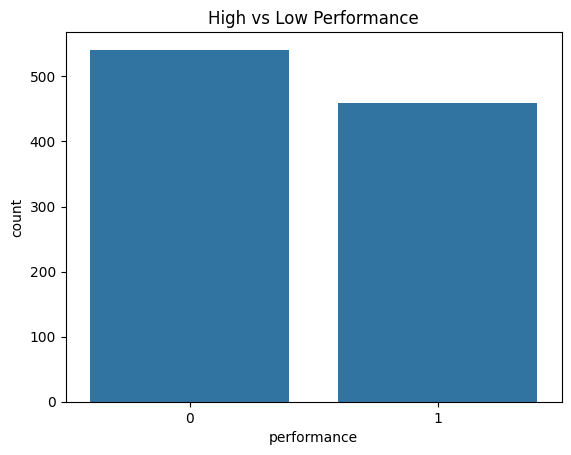

In [5]:
# 5. VISUALIZATION (Optional)
sns.countplot(data=df, x='performance')
plt.title("High vs Low Performance")
plt.show()

In [6]:
# 6. ENCODE CATEGORICAL FEATURES

# We'll encode gender, race/ethnicity, parental level of education, lunch, test preparation
label_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
df_encoded = df.copy()

for col in label_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])


In [7]:
# 7. PREPARE FEATURES AND LABEL

X = df_encoded.drop(columns=['math score', 'reading score', 'writing score', 'average_score', 'performance'])
y = df_encoded['performance']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:

# 8. MODEL TRAINING (Random Forest)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

Accuracy: 0.595

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.65      0.64       110
           1       0.55      0.52      0.54        90

    accuracy                           0.59       200
   macro avg       0.59      0.59      0.59       200
weighted avg       0.59      0.59      0.59       200



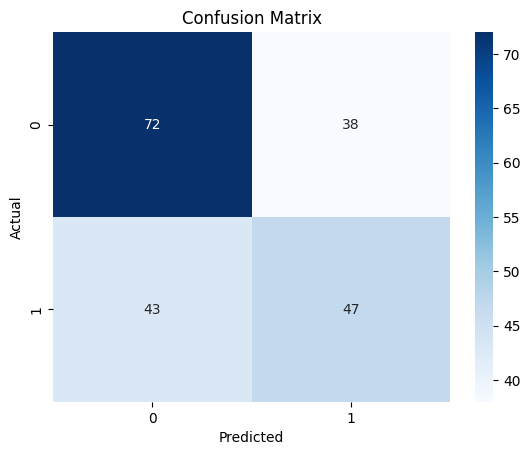

In [9]:
# 9. EVALUATION

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()